In [ ]:
#import the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Importing the pandas library
import pandas as pd

# Reading the 'diabetes.csv' file
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
# we remove the 'Outcome' column from the dataset (df) because it represents the target, and X contains the features.
# we assign the 'Outcome' column as the target variable y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Splitting the data into training set (X_train, y_train) and testing set (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [ ]:
# Importing the Gaussian Naive Bayes classifier from the scikit-learn library.
from sklearn.naive_bayes import GaussianNB

# Creating an instance of the Gaussian Naive Bayes model, which will be used for classification.
model = GaussianNB()

# Training the model using the training data (X_train for features, y_train for target labels).
model.fit(X_train, y_train)

In [ ]:
#Here the accuracy of the model is calculated

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.6771653543307087
F1 Score: 0.684746683234644


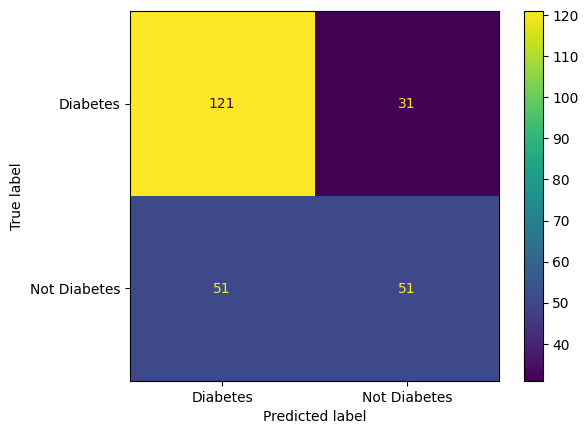

In [ ]:
# view ConfusionMatrix of the model
labels = ["Diabetes", "Not Diabetes"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)


Accuracy  71.25984251968504


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


feature_importances:
 Glucose                     0.282089
BMI                         0.158120
Age                         0.142116
DiabetesPedigreeFunction    0.113127
BloodPressure               0.084052
Pregnancies                 0.080552
SkinThickness               0.070559
Insulin                     0.069385
dtype: float64


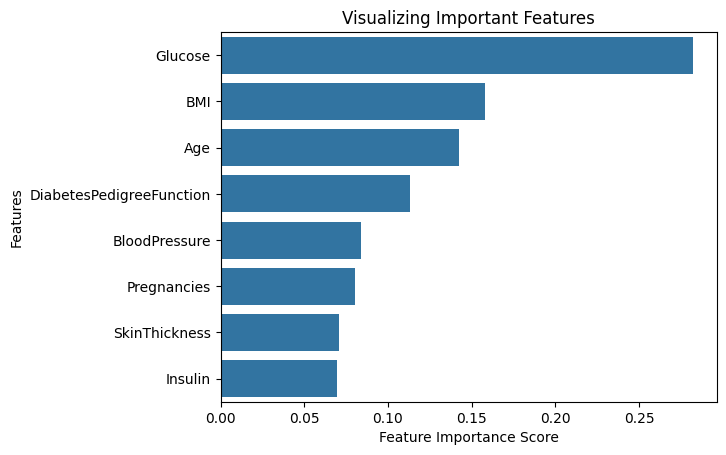

In [ ]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

 # Print important features
print("feature_importances:\n", feature_scores)

# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')
# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()
